In [1]:
import FlowCal
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import math
import seaborn as sns
import os

In [2]:
# Indicate a folder containing cell data
# folder_c = CELL_DATA_FOLDER('~/20220420')

In [3]:
# out_folder = OUTPUT_FOLDER ('~/processed/20220420_out') 

In [4]:
filenames_c = ['K562-aCD71_K562 aCD71-AF647.fcs', \
               'K562-aCD71_K562 aCD71-FITC_001.fcs', \
               'K562-aCD71_MACS-Pre.fcs', \
               'K562-aCD71_MACS-Post.fcs', \
               'K562-aCD71_MACS-Pass through.fcs']

In [5]:
Gate_FITC = 1e3
Gate_AF647 = 1e3

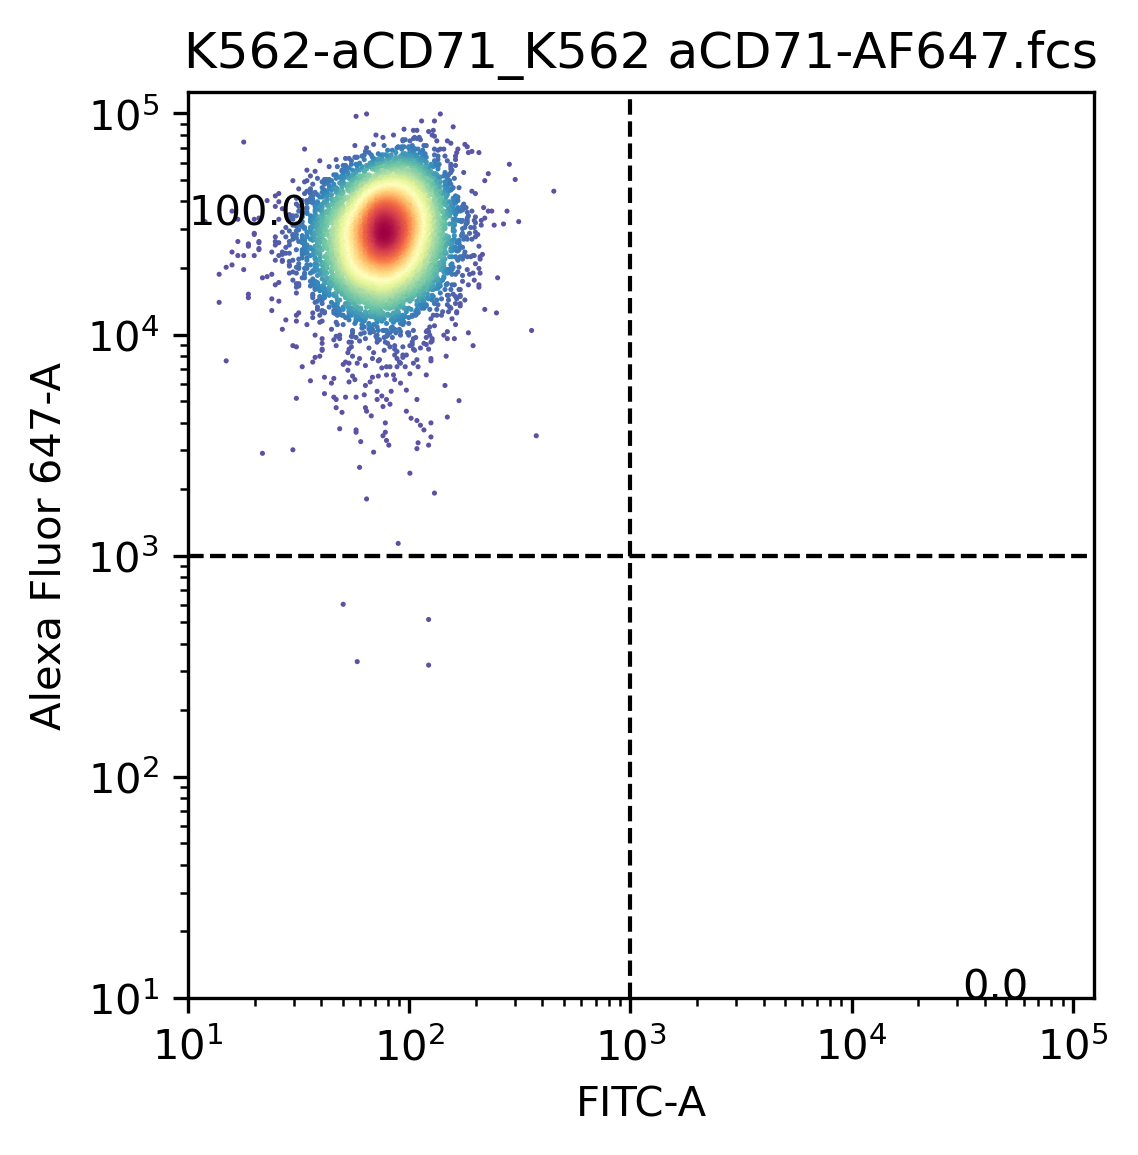

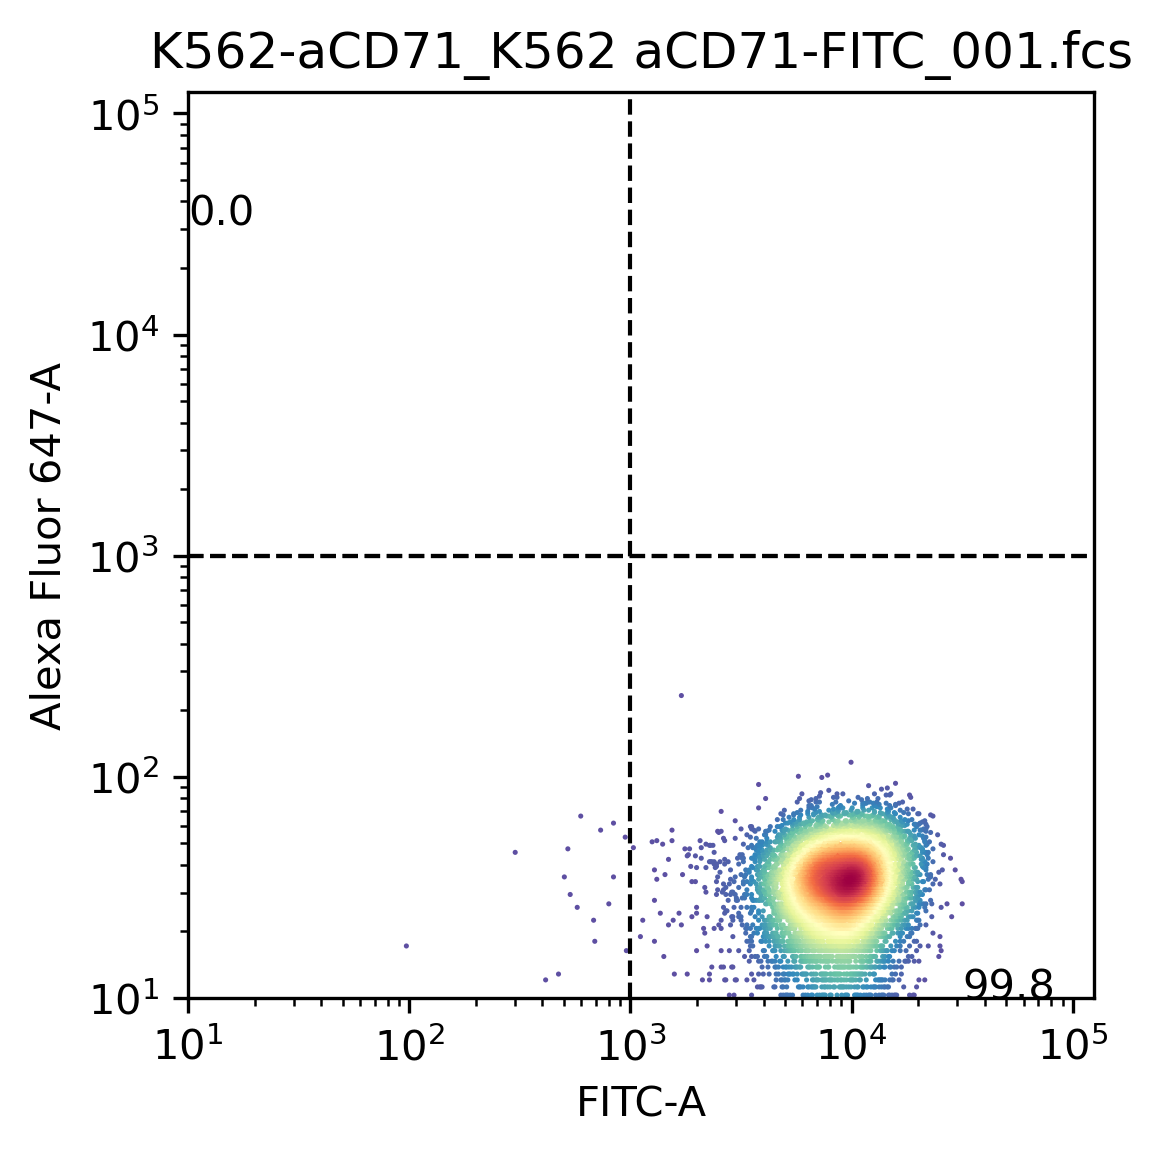

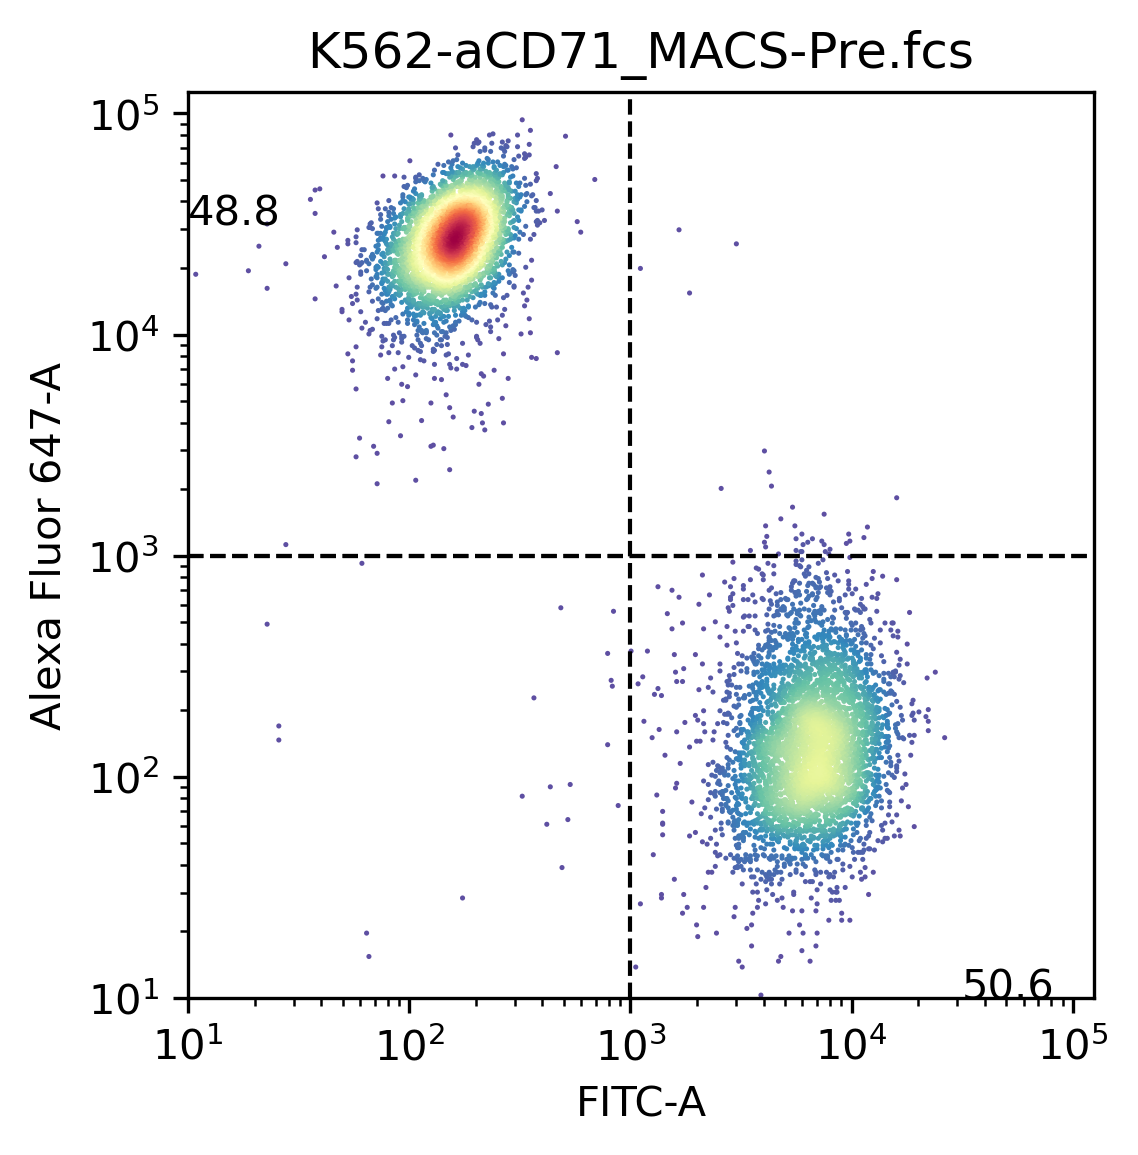

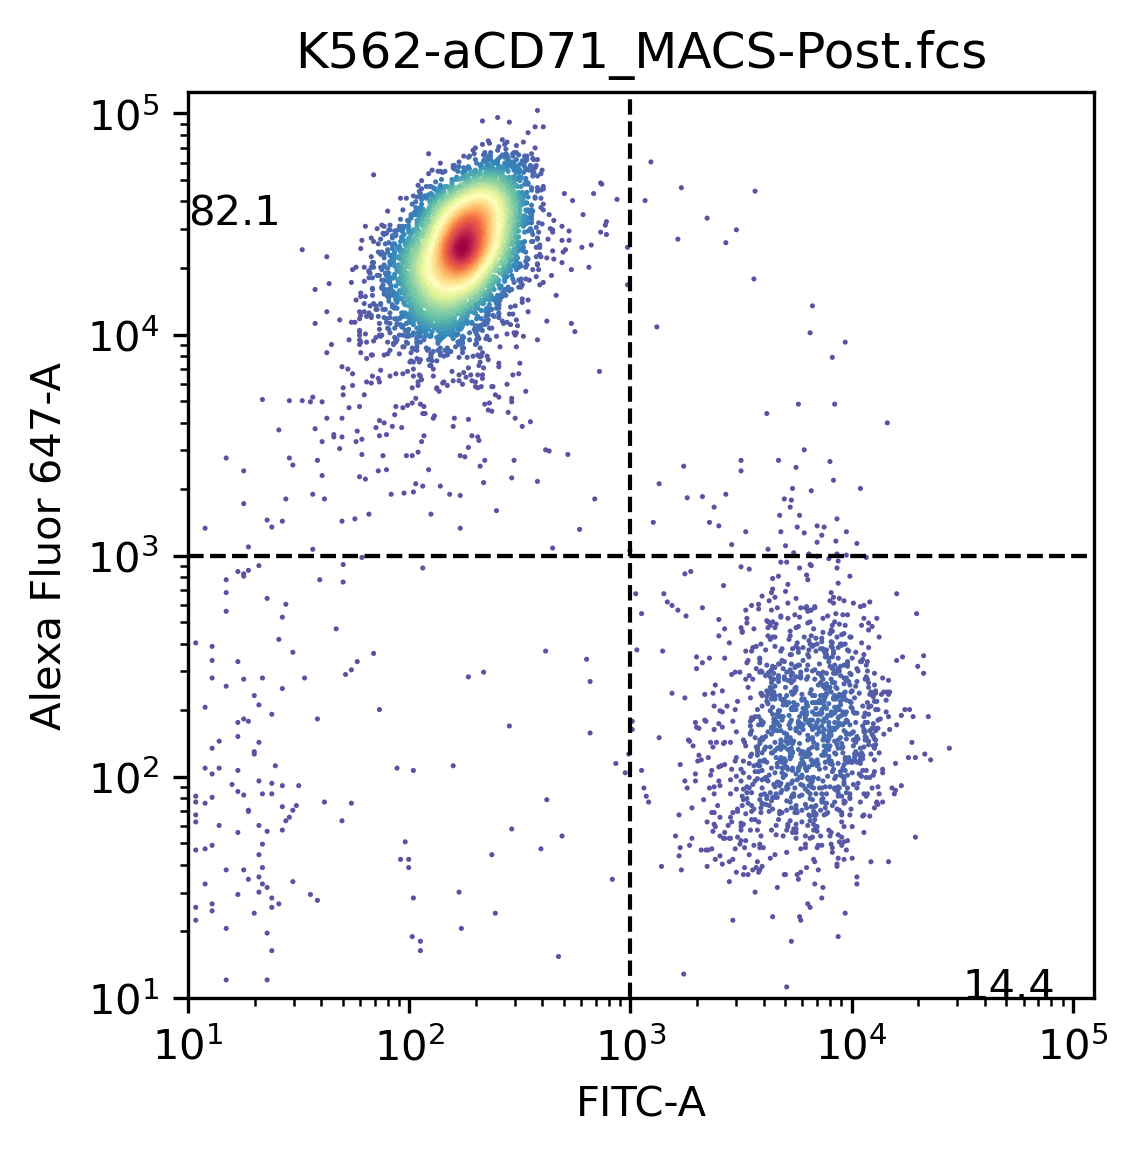

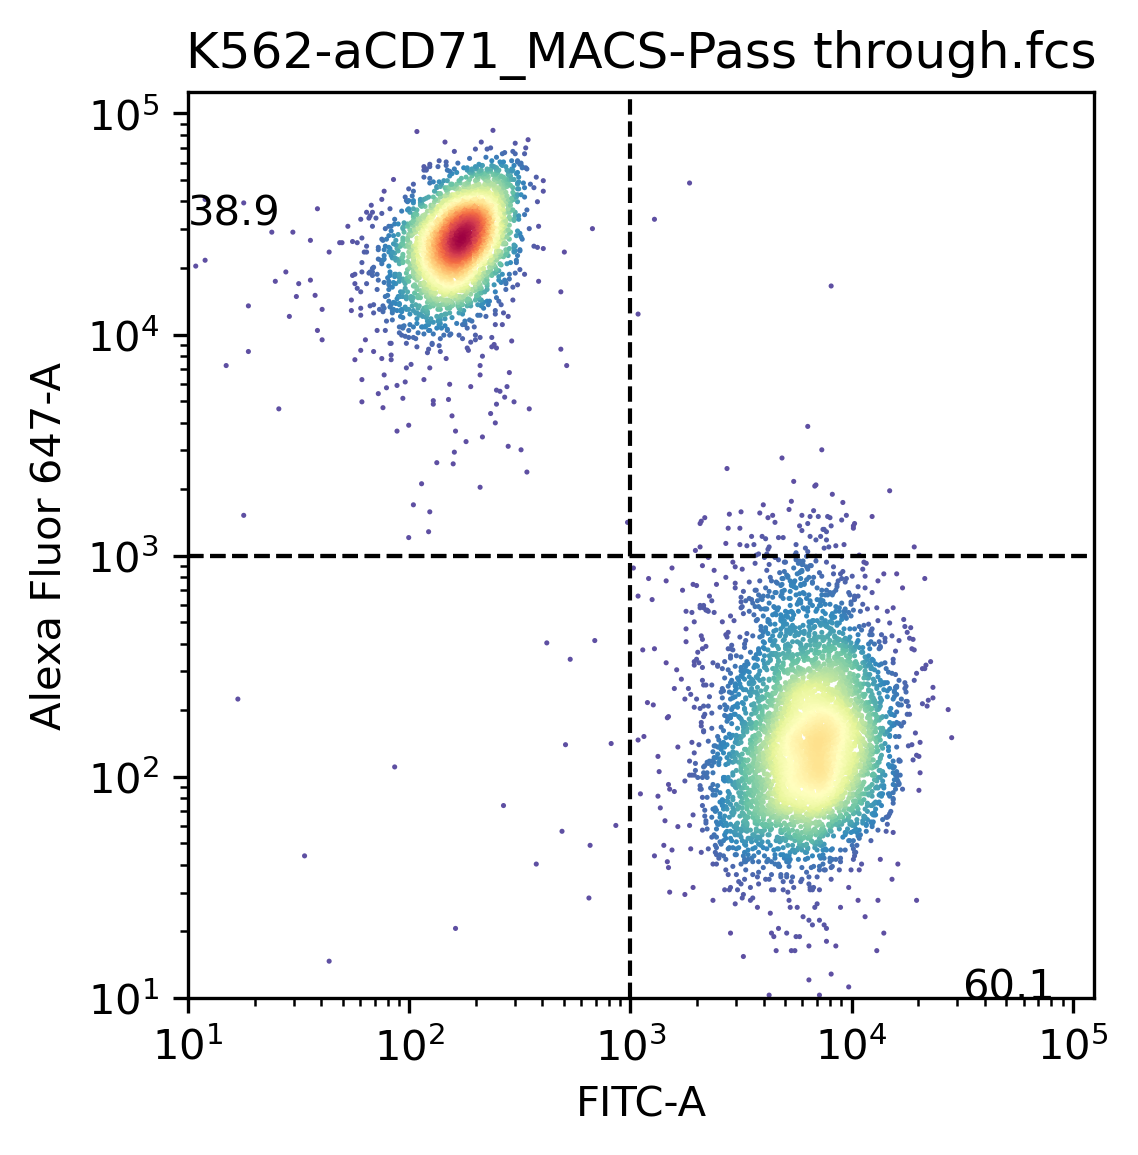

In [6]:
# FITC vs AF647 plot

for filename in filenames_c:
    # read a fcs file
    fcs = FlowCal.io.FCSData(folder_c + filename)
    
    # clean up
    fcs = FlowCal.gate.density2d(fcs, channels=['FSC-A', 'SSC-A'], gate_fraction=0.8)
    fcs_df = pd.DataFrame(fcs, columns = fcs.channels)

    # define pct_FITC and pct_AF647
    pct_FITC = 100*((fcs_df['FITC-A'] > Gate_FITC) & (fcs_df['Alexa Fluor 647-A'] <= Gate_AF647)).sum() / len(fcs_df)
    pct_AF647 = 100*((fcs_df['FITC-A'] <= Gate_FITC) & (fcs_df['Alexa Fluor 647-A'] > Gate_AF647)).sum() / len(fcs_df)

    pct_FITC = math.ceil(pct_FITC * 10) / 10
    pct_AF647 = math.ceil(pct_AF647 * 10) / 10

    # plot cleaned data with gating conditions & results
    
    fig, ax = plt.subplots(1,1,figsize=[12,4], dpi=300)

    ax.set_aspect('equal')
    ax.set_title(filename)
    ax.text(10**4.5, 10, pct_FITC)
    ax.text(10, 10**4.5, pct_AF647)
    ax.axvline(x=Gate_FITC, color = 'k', linestyle='dashed', linewidth=1)
    ax.axhline(y=Gate_AF647, color = 'k', linestyle='dashed', linewidth=1)
    ax.axhline(y=Gate_AF647, color = 'k', linestyle='dashed', linewidth=1)
    ax = FlowCal.plot.density2d(fcs, channels=['FITC-A', 'Alexa Fluor 647-A'], mode='scatter', xscale='log',yscale='log', xlim=(10, 125000), ylim=(10, 125000))
    plt.savefig(out_folder + filename[:-4] + '_processed_plot.pdf')
    plt.show()
    plt.close()